In [1]:
import xarray as xr

# Adding topography

Since zarr does not allow appending by variables, we have to load the data in by itself and append our topography data

In [11]:
ds = xr.open_zarr('shared/data/FINAL_IO_025GRID_DAILY.zarr/')
topo = xr.open_dataarray('shared/data/finalized/topography.nc')

In [12]:
topo

<xarray.DataArray 'topo' (lat: 177, lon: 241)>
array([[  349.,   307.,   292., ...,  4056.,  4074.,  2786.],
       [  350.,   312.,   311., ...,  3193.,  3800.,  2354.],
       [  340.,   312.,   290., ...,  4439.,  4363.,  3235.],
       ...,
       [-2268., -2762., -2922., ..., -4937., -5166., -4983.],
       [-2485., -2815., -3090., ..., -4672., -5028., -4680.],
       [-2658., -2950., -3186., ..., -4438., -3285., -3727.]])
Coordinates:
  * lon      (lon) float32 42.0 42.25 42.5 42.75 ... 101.2 101.5 101.8 102.0
  * lat      (lat) float32 32.0 31.75 31.5 31.25 ... -11.25 -11.5 -11.75 -12.0
Attributes:
    colorBarMaximum:  8000.0
    colorBarMinimum:  -8000.0
    colorBarPalette:  Topography
    grid_mapping:     GDAL_Geographics
    ioos_category:    Location
    long_name:        Topography
    standard_name:    altitude
    units:            meters

In [13]:
ds['topo'] = (['lat', 'lon'], topo.values)

In [14]:
ds

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/15)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ...               ...
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    topo             (lat, lon) float64 349.0 307.0 ... -3.285e+03 -3.727e+03
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [15]:
ds.topo.attrs = topo.attrs

In [17]:
ds['topo'] = ds.topo.chunk({'lat': 177, 'lon': 241})

In [18]:
ds

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/15)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ...               ...
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    topo             (lat, lon) float64 dask.array<chunksize=(177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [19]:
ds.to_zarr('shared/data/INDIAN_OCEAN_025GRID_DAILY.zarr', consolidated=True)

# Finer scale topo

In [2]:
topo_finerscale = xr.open_dataarray('shared/data/usgsCeSrtm30v6_7e43_833f_c150.nc')

In [3]:
topo_chunk = topo_finerscale.chunk({'latitude': 1000, 'longitude': 1000})

In [ ]:
# different chunk size may be better?
topo_chunk = topo_finerscale.chunk({'latitude': 5000, 'longitude': 5000})

In [ ]:
# memory overload when trying to plot original, so used chunked version instead
topo_chunk.plot.imshow()

In [4]:
# attempt to reduce resolution
topo_scaled_2x = topo_chunk.coarsen(latitude=2).mean().coarsen(longitude=2).mean()

In [5]:
topo_scaled_2x

<xarray.DataArray 'topo' (latitude: 10800, longitude: 21600)>
dask.array<mean_agg-aggregate, shape=(10800, 21600), dtype=float32, chunksize=(500, 500), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.98 89.96 ... -89.95 -89.97 -89.99
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    colorBarMaximum:  8000.0
    colorBarMinimum:  -8000.0
    colorBarPalette:  Topography
    grid_mapping:     GDAL_Geographics
    ioos_category:    Location
    long_name:        Topography
    standard_name:    altitude
    units:            meters

In [6]:
topo_scaled_4x = topo_chunk.coarsen(latitude=4).mean().coarsen(longitude=4).mean()

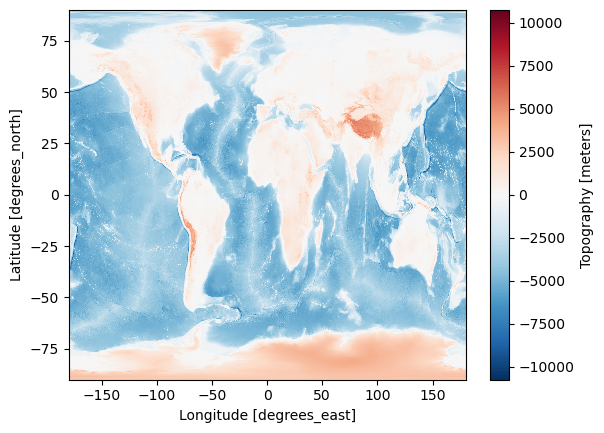

In [7]:
topo_scaled_4x.plot.imshow()

In [13]:
topo_chunked_roi = topo_chunk.sel(longitude=slice(42, 102), latitude=slice(32, -12)).chunk({'latitude': 1000, 'longitude': 1000})

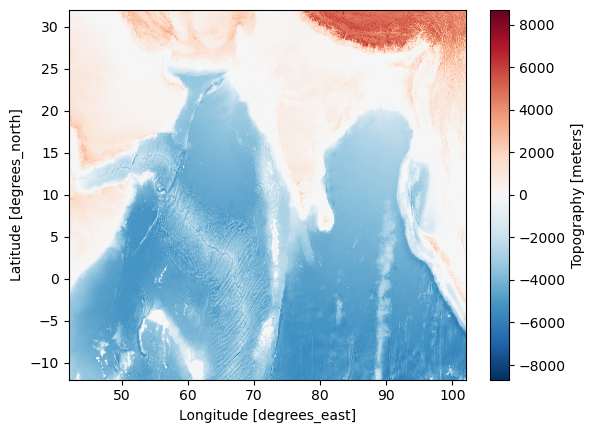

In [17]:
topo_chunked_roi.plot.imshow()

In [19]:
topo_chunked_roi.to_netcdf('shared/data/INDIAN_OCEAN_HQ_TOPO.nc')

# Fix attributes

In [2]:
ds = xr.open_zarr('shared/data/INDIAN_OCEAN_025GRID_DAILY.zarr/')

In [4]:
ds['direction'].attrs['units'] = 'degrees'

In [7]:
ds

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/15)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ...               ...
    u_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [6]:
ds.attrs['source'] = "Earth & Space Research (ESR), Copernicus Climate Change Service (C3S), Copernicus Marine Environment Monitoring Service (CMEMS), United States Geological Survey (USGS)"

In [8]:
ds.to_zarr('shared/data/INDIAN_OCEAN_DAILY_025GRID.zarr/')